In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import auc  # calculate the area under the curve
warnings.filterwarnings('ignore')

In [117]:
d = 0.025 #[cm]  diametr
l = 0.9 # [cm] length
A = np.pi * d * l # [cm2] area
acid_25 = pd.read_csv('data_files/25mVs_acid.csv')
copper_25 = pd.read_csv('data_files/25mVs_copper.csv')
acid_50 = pd.read_csv('data_files/50mVs_acid.csv')
acid_75 = pd.read_csv('data_files/75mVs_acid.csv')
acid_100 = pd.read_csv('data_files/100mVs_acid.csv')

In [118]:
A

0.07068583470577035

In [119]:
acid_25_2nd_scan = acid_25[acid_25.Scan == 2]
acid_50_2nd_scan = acid_50[acid_50.Scan == 2]
acid_75_2nd_scan = acid_75[acid_75.Scan == 2]
acid_100_2nd_scan = acid_100[acid_100.Scan == 2]
copper_25_2nd_scan = copper_25[copper_25.Scan == 2]

In [120]:
acid_25_2nd_scan['Voltage'] = acid_25_2nd_scan['WE_1_Potential_V'] * 1000
acid_50_2nd_scan['Voltage'] = acid_50_2nd_scan['WE_1_Potential_V'] * 1000
acid_75_2nd_scan['Voltage'] = acid_75_2nd_scan['WE_1_Potential_V'] * 1000
acid_100_2nd_scan['Voltage'] = acid_100_2nd_scan['WE_1_Potential_V'] * 1000
copper_25_2nd_scan['Voltage'] = copper_25_2nd_scan['WE_1_Potential_V'] * 1000

acid_25_2nd_scan['Current'] = acid_25_2nd_scan['WE_1_Current_A'] * 1000000
acid_50_2nd_scan['Current'] = acid_50_2nd_scan['WE_1_Current_A'] * 1000000
acid_75_2nd_scan['Current'] = acid_75_2nd_scan['WE_1_Current_A'] * 1000000
acid_100_2nd_scan['Current'] = acid_100_2nd_scan['WE_1_Current_A'] * 1000000
copper_25_2nd_scan['Current'] = copper_25_2nd_scan['WE_1_Current_A'] * 1000000

In [121]:
acid_25_2nd_scan.head()

,Scan,Index,Time_s,WE_1_Potential_V,WE_1_Current_A,Voltage,Current
918,2,919,116.13113,0.704041,9.411621e-07,704.040527,0.941162
919,2,920,116.25113,0.707092,9.606934e-07,707.092285,0.960693
920,2,921,116.37113,0.710144,9.820557e-07,710.144043,0.982056
921,2,922,116.49113,0.713196,1.003113e-06,713.195801,1.003113
922,2,923,116.61113,0.716248,1.021423e-06,716.247559,1.021423


In [122]:
def plot_one_voltammogram(data):
    current = data['Current']
    voltage = data['Voltage']
    label_fontsize = 20
    plt.figure(figsize=(12, 8))
    plt.grid(alpha=.4,linestyle='--')
    plt.plot(voltage, current)
    plt.xlabel('Voltage [mV]', fontsize=label_fontsize)
    plt.ylabel(r'Current $[\mu$A]', fontsize=label_fontsize)
#     plt.fill(voltage, current)

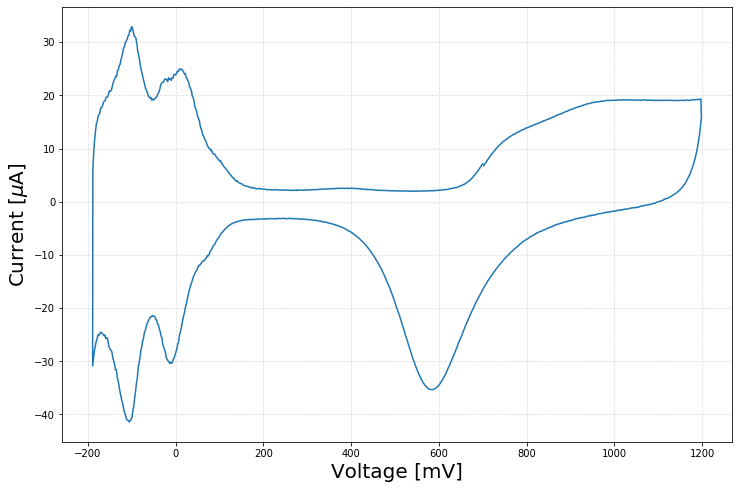

In [123]:
plot_one_voltammogram(acid_100_2nd_scan)

In [124]:
datasets = {'acid 25 mVs 2nd cycle' : acid_25_2nd_scan,
            'acid 50 mVs 2nd cycle' : acid_50_2nd_scan,
            'acid 75 mVs 2nd cycle' : acid_75_2nd_scan,
            'acid 100 mVs 2nd cycle': acid_100_2nd_scan}

In [125]:
def plot_many_voltammograms(datasets):
    """
    Аргумент функции это словарь, где ключ это название, которое будет отражено в легенде графика,
    а значение это ссылка на таблицу где в колонке 'Current' содержатся значения тока в мкА,
    a в колонке 'Voltage' значения соответствующего потенциала в mV
    """
    plt.figure(figsize=(12, 10))
    plt.grid(alpha=.4,linestyle='--')
    plt.xlabel('Voltage [mV]', fontsize=16)
    plt.ylabel(r'Current $[\mu$A]', fontsize=16)
    scan_rate = 25
    for data in datasets:
        current = datasets[data]['Current']
        voltage = datasets[data]['Voltage']
        plt.plot(voltage, current, label=data)
    plt.legend()

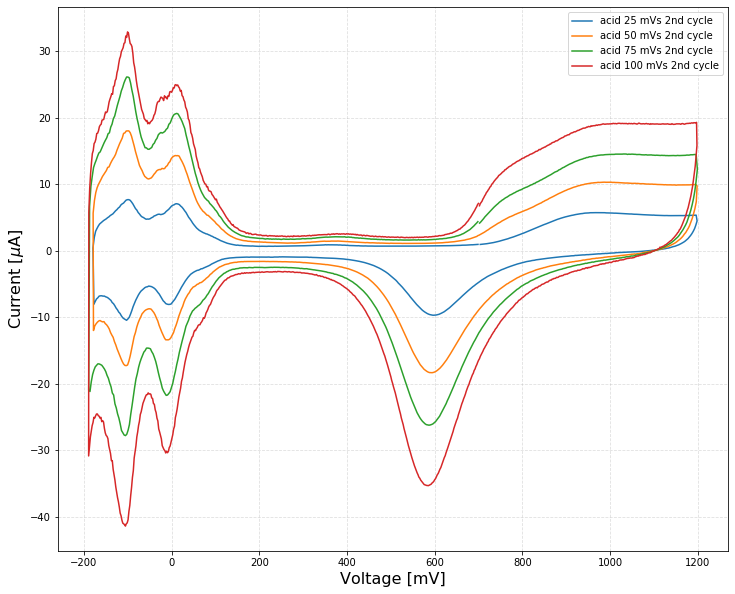

In [126]:
plot_many_voltammograms(datasets)

In [127]:
def cyclic_voltammograms_regions(datasets, left_border=150, right_border=450):
    """
    Эта функция позволяет изобразить различные регионы на cyclic voltammograms,
    left_border - отвечает за левую границу double layer region
    right_border - отвечает за правую границу double layer region,
    регионы отображаются на последней в переданном словаре voltammogram
    """
    plt.figure(figsize=(10, 8))
    plt.grid(alpha=.4,linestyle='--')
    plt.xlabel('Voltage [mV]', fontsize=16)
    plt.ylabel(r'Current $[\mu$A]', fontsize=16)
    scan_rate = 25
    for data in datasets:
        current = datasets[data]['Current']
        voltage = datasets[data]['Voltage']
        plt.plot(voltage, current, label=data)
    hydrogen_region = datasets[data][datasets[data]['Voltage'] < left_border]
    voltage = hydrogen_region['Voltage']
    current = hydrogen_region['Current']
    plt.plot(voltage, current)
    plt.fill(voltage, current, alpha=.2, label='Hydrogen region')

    double_layer = datasets[data][(datasets[data]['Voltage'] >= left_border) & (datasets[data]['Voltage'] <= right_border)]
    voltage = double_layer['Voltage']
    current = double_layer['Current']
    plt.plot(voltage, current)
    plt.fill(voltage, current, alpha=.2, label='Double layer region')

    oxygen_region = datasets[data][datasets[data]['Voltage'] > right_border]
    voltage = oxygen_region['Voltage']
    current = oxygen_region['Current']
    plt.plot(voltage, current)
    plt.fill(voltage, current, alpha=.2, label='Oxygen region')
    plt.legend()

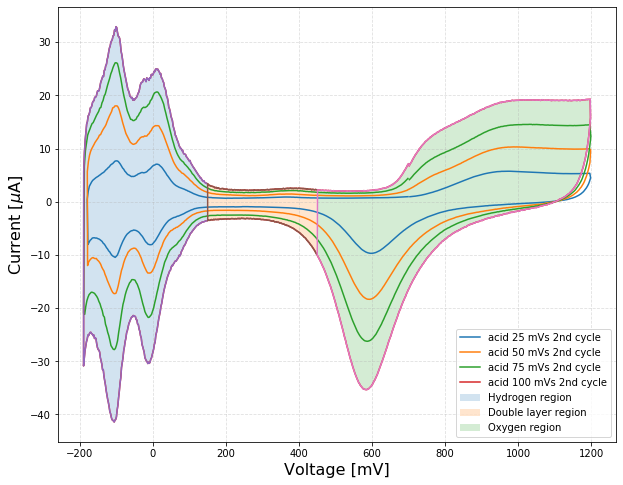

In [128]:
cyclic_voltammograms_regions(datasets, left_border=150, right_border=450)

In [129]:
def current_scan_rate_linear(low, top):
    print('Scan rate: 100')
    print(acid_100_2nd_scan[(acid_100_2nd_scan['Voltage'] < top) & (acid_100_2nd_scan['Voltage'] > low)][['Voltage', 'Current']] )
    print()
    print('Scan rate: 75')
    print(acid_75_2nd_scan[(acid_75_2nd_scan['Voltage'] < top) & (acid_75_2nd_scan['Voltage'] > low)][['Voltage', 'Current']] )
    print()
    print('Scan rate: 50')
    print(acid_50_2nd_scan[(acid_50_2nd_scan['Voltage'] < top) & (acid_50_2nd_scan['Voltage'] > low)][['Voltage', 'Current']])
    print()
    print('Scan rate: 25')
    print(acid_25_2nd_scan[(acid_25_2nd_scan['Voltage'] < top) & (acid_25_2nd_scan['Voltage'] > low)][['Voltage', 'Current']])

In [130]:
current_scan_rate_linear(top=301, low=298)

Scan rate: 100
         Voltage   Current
2084  300.476074 -3.348389
2085  298.492432 -3.344727
2573  298.828125  2.216797
2574  300.842285  2.213440

Scan rate: 75
         Voltage   Current
1389  299.530029 -2.682800
1714  298.217773  1.818848

Scan rate: 50
         Voltage   Current
1382  300.872803 -1.798706
1702  300.903320  1.214905

Scan rate: 25
         Voltage   Current
1383  299.835205 -0.955505
1702  299.499512  0.735474


In [131]:
current_scan = pd.DataFrame({'Scan_rate': [25, 50, 75, 100],
                            'Current_oxygen_region': [.888367, 1.912231, 3.538818, 5.444336],
                            'Current_hydrogen_region': [3.894043, 8.627319, 12.466431, 16.082764],
                            'Current_double_layer_region' : [0.735474, 1.214905, 1.818848, 2.216797]})

In [132]:
current_scan

,Scan_rate,Current_oxygen_region,Current_hydrogen_region,Current_double_layer_region
0,25,0.888367,3.894043,0.735474
1,50,1.912231,8.627319,1.214905
2,75,3.538818,12.466431,1.818848
3,100,5.444336,16.082764,2.216797


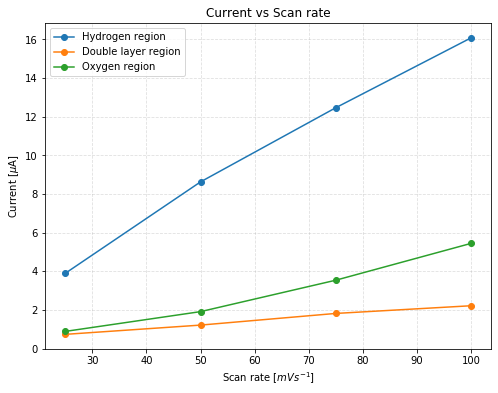

In [133]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=.4,linestyle='--')
plt.xlabel(r'Scan rate $[mVs^{-1}]$')
plt.ylabel(r'Current $[\mu$A]')

plt.plot(current_scan['Scan_rate'], current_scan['Current_hydrogen_region'], '-o', label = 'Hydrogen region')
plt.plot(current_scan['Scan_rate'], current_scan['Current_double_layer_region'], '-o', label = 'Double layer region')
plt.plot(current_scan['Scan_rate'], current_scan['Current_oxygen_region'], '-o' , label='Oxygen region')


plt.title('Current vs Scan rate')
plt.legend()

In [134]:
current_scan['Capacitance'] = current_scan['Current_double_layer_region'] / (A *  current_scan['Scan_rate']/1000)

In [135]:
current_scan

,Scan_rate,Current_oxygen_region,Current_hydrogen_region,Current_double_layer_region,Capacitance
0,25,0.888367,3.894043,0.735474,416.193147
1,50,1.912231,8.627319,1.214905,343.747798
2,75,3.538818,12.466431,1.818848,343.085807
3,100,5.444336,16.082764,2.216797,313.612623


Text(0.5, 1.0, 'Capacitance vs Scan rate')

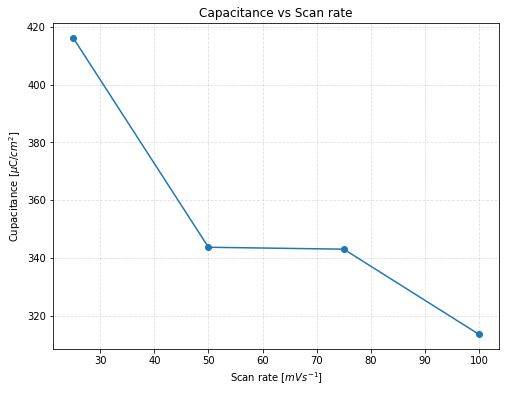

In [136]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=.4,linestyle='--')
plt.xlabel(r'Scan rate $[mVs^{-1}]$')
plt.ylabel(r'Cupacitance $[\mu$C/$cm^{2}$]')

plt.plot(current_scan['Scan_rate'], current_scan['Capacitance'], '-o')

plt.title('Capacitance vs Scan rate')

# Area calculations

In [137]:
current_scan_rate_linear(top=301, low=298)

Scan rate: 100
         Voltage   Current
2084  300.476074 -3.348389
2085  298.492432 -3.344727
2573  298.828125  2.216797
2574  300.842285  2.213440

Scan rate: 75
         Voltage   Current
1389  299.530029 -2.682800
1714  298.217773  1.818848

Scan rate: 50
         Voltage   Current
1382  300.872803 -1.798706
1702  300.903320  1.214905

Scan rate: 25
         Voltage   Current
1383  299.835205 -0.955505
1702  299.499512  0.735474


In [138]:
areas = {'scan_rate' : [25, 50, 75, 100],
    'hydrogen_adsorption_area' : [],
     'hydrogen_desorption_area' : [],
     'double_layer_area_anodic': [],
     'double_layer_area_cathodic': [], }

In [139]:
acid_25_2nd_scan.Voltage.min()

-179.107666015625

In [140]:
def area_calculations(data, anodic_current, cathodic_current, boundary = 170, lbl = None): 
    plt.figure(figsize=(10, 8))
    hydrogen_desorption = data[(data['Current'] > 0) & (data['Voltage'] < boundary)]
    voltage = hydrogen_desorption['Voltage']
    current = hydrogen_desorption['Current']
    plt.plot(voltage,current)
    plt.fill_between(voltage, current, anodic_current, alpha=.2, label='Hydrogen desorption')


    hydrogen_adsorption = data[(data['Current'] < 0) & (data['Voltage'] < boundary)]
    voltage = hydrogen_adsorption['Voltage']
    current = hydrogen_adsorption['Current']
    plt.plot(voltage, current)
    
    plt.fill_between(voltage, current, cathodic_current, alpha=.2, label='Hydrogen adsorption')

    plt.fill_between(voltage, cathodic_current, 0, alpha=.3, label='Double layer region (-)')
    plt.fill_between(voltage, 0, anodic_current, alpha=.3, label='Double layer region (+)')
    
    plt.grid(alpha=.4,linestyle='--')
    plt.xlabel('Voltage [mV]')
    plt.ylabel(r'Current $[\mu$A]')
    plt.title(lbl, fontsize = 16)
    plt.legend()

    hydrogen_desorption_area = auc(hydrogen_desorption['Voltage'],hydrogen_desorption['Current'])
    hydrogen_adsorption_area = auc(hydrogen_adsorption['Voltage'],hydrogen_adsorption['Current'])
    double_layer_area_positive = (hydrogen_adsorption.Voltage.max() - hydrogen_adsorption.Voltage.min()) * anodic_current
    double_layer_area_negative = (hydrogen_adsorption.Voltage.max() - hydrogen_adsorption.Voltage.min()) * cathodic_current
    areas['hydrogen_adsorption_area'] += [hydrogen_adsorption_area]
    areas['hydrogen_desorption_area'] += [hydrogen_desorption_area]
    
    areas['double_layer_area_anodic'] += [double_layer_area_positive]
    areas['double_layer_area_cathodic'] += [double_layer_area_negative]
    
    
    print(f'Hydrogen desorption area: {hydrogen_desorption_area:.2f}')
    print(f'Hydrogen adsorption area: {hydrogen_adsorption_area:.2f}')
    print(f'Double layer area anodic (+): {double_layer_area_positive:.2f}')
    print(f'Double layer catodic (-): {double_layer_area_negative:.2f}')
    return areas

Hydrogen desorption area: 1506.89
Hydrogen adsorption area: -1800.11
Double layer area anodic (+): 254.21
Double layer catodic (-): -330.26


{'scan_rate': [25, 50, 75, 100],
 'hydrogen_adsorption_area': [-1800.1134973019361],
 'hydrogen_desorption_area': [1506.8947989493608],
 'double_layer_area_anodic': [254.21077038574217],
 'double_layer_area_cathodic': [-330.26274505615237]}

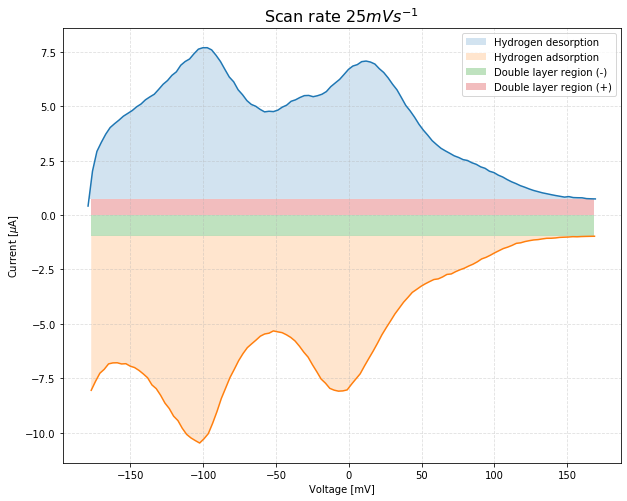

In [141]:
area_calculations(acid_25_2nd_scan, anodic_current=0.735474, cathodic_current=-0.955505, lbl=r'Scan rate $25 mVs^{-1}$')

Hydrogen desorption area: 3439.30
Hydrogen adsorption area: -2965.59
Double layer area anodic (+): 421.70
Double layer catodic (-): -624.34


{'scan_rate': [25, 50, 75, 100],
 'hydrogen_adsorption_area': [-1800.1134973019361, -2965.590665116906],
 'hydrogen_desorption_area': [1506.8947989493608, 3439.2973873764277],
 'double_layer_area_anodic': [254.21077038574217, 421.7019491577148],
 'double_layer_area_cathodic': [-330.26274505615237, -624.3433240966797]}

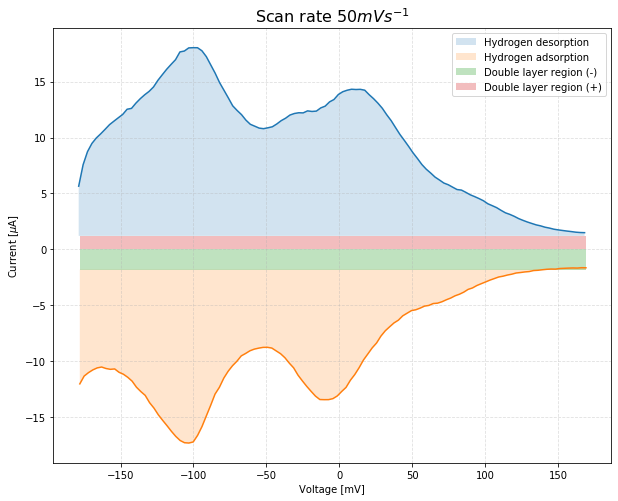

In [142]:
area_calculations(acid_50_2nd_scan, anodic_current=1.214905, cathodic_current=-1.798706, lbl=r'Scan rate $50 mVs^{-1}$')

Hydrogen desorption area: 5016.33
Hydrogen adsorption area: -5042.01
Double layer area anodic (+): 648.49
Double layer catodic (-): -956.52


{'scan_rate': [25, 50, 75, 100],
 'hydrogen_adsorption_area': [-1800.1134973019361,
  -2965.590665116906,
  -5042.012156918645],
 'hydrogen_desorption_area': [1506.8947989493608,
  3439.2973873764277,
  5016.327812336385],
 'double_layer_area_anodic': [254.21077038574217,
  421.7019491577148,
  648.4863642578125],
 'double_layer_area_cathodic': [-330.26274505615237,
  -624.3433240966797,
  -956.5171020507812]}

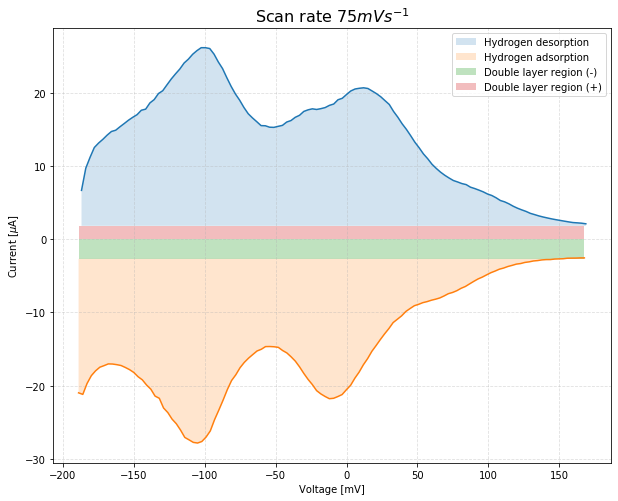

In [143]:
area_calculations(acid_75_2nd_scan, anodic_current=1.818848, cathodic_current=-2.682800, lbl=r'Scan rate $75 mVs^{-1}$')

Hydrogen desorption area: 6287.55
Hydrogen adsorption area: -7294.29
Double layer area anodic (+): 791.47
Double layer catodic (-): -1195.99


{'scan_rate': [25, 50, 75, 100],
 'hydrogen_adsorption_area': [-1800.1134973019361,
  -2965.590665116906,
  -5042.012156918645,
  -7294.292221777141],
 'hydrogen_desorption_area': [1506.8947989493608,
  3439.2973873764277,
  5016.327812336385,
  6287.550702691078],
 'double_layer_area_anodic': [254.21077038574217,
  421.7019491577148,
  648.4863642578125,
  791.4696191406249],
 'double_layer_area_cathodic': [-330.26274505615237,
  -624.3433240966797,
  -956.5171020507812,
  -1195.9889605407714]}

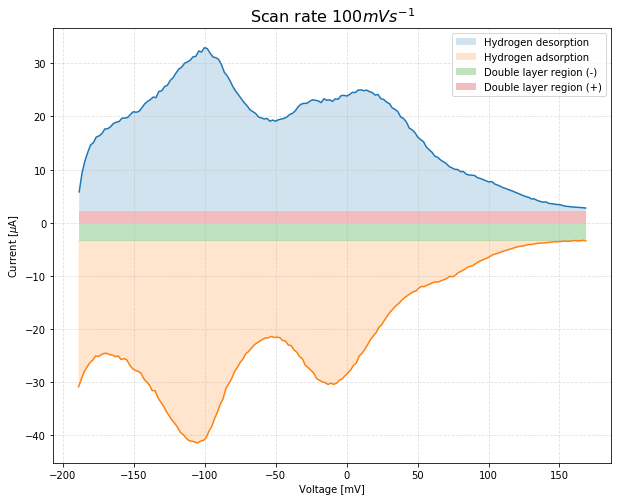

In [144]:
area_calculations(acid_100_2nd_scan, anodic_current=2.213440, cathodic_current=-3.344727, lbl=r'Scan rate $100 mVs^{-1}$')

In [145]:
areas = pd.DataFrame(areas)

In [146]:
areas

,scan_rate,hydrogen_adsorption_area,hydrogen_desorption_area,double_layer_area_anodic,double_layer_area_cathodic
0,25,-1800.113497,1506.894799,254.210770,-330.262745
1,50,-2965.590665,3439.297387,421.701949,-624.343324
2,75,-5042.012157,5016.327812,648.486364,-956.517102
3,100,-7294.292222,6287.550703,791.469619,-1195.988961


In [147]:
charges = pd.DataFrame({'scan_rate' : [25, 50, 75, 100]})

In [148]:
charges['Q_hydrogen_desorption'] = areas['hydrogen_desorption_area'] / areas['scan_rate']
charges['Q_hydrogen_adsorption'] = areas['hydrogen_adsorption_area'] / areas['scan_rate']
charges['Q_double_layer_anodic'] = areas['double_layer_area_anodic']/ areas['scan_rate']
charges['Q_double_layer_cathodic'] = areas['double_layer_area_cathodic'] / areas['scan_rate']
charges['Q_passed_desorbtion'] = charges['Q_hydrogen_desorption'] - charges['Q_double_layer_anodic']
charges['Q_passed_adsorption'] = charges['Q_hydrogen_adsorption'] - charges['Q_double_layer_cathodic']

In [149]:
charges

,scan_rate,Q_hydrogen_desorption,Q_hydrogen_adsorption,Q_double_layer_anodic,Q_double_layer_cathodic,Q_passed_desorbtion,Q_passed_adsorption
0,25,60.275792,-72.004540,10.168431,-13.210510,50.107361,-58.794030
1,50,68.785948,-59.311813,8.434039,-12.486866,60.351909,-46.824947
2,75,66.884371,-67.226829,8.646485,-12.753561,58.237886,-54.473267
3,100,62.875507,-72.942922,7.914696,-11.959890,54.960811,-60.983033


In [150]:
charges['RSA'] = charges['Q_passed_desorbtion'] / 210
charges['Rf'] = charges['RSA'] / A

In [151]:
charges['dQ'] = charges['Q_passed_adsorption'] + charges['Q_passed_desorbtion']

In [152]:
charges

,scan_rate,Q_hydrogen_desorption,Q_hydrogen_adsorption,Q_double_layer_anodic,Q_double_layer_cathodic,Q_passed_desorbtion,Q_passed_adsorption,RSA,Rf,dQ
0,25,60.275792,-72.004540,10.168431,-13.210510,50.107361,-58.794030,0.238606,3.375591,-8.686669
1,50,68.785948,-59.311813,8.434039,-12.486866,60.351909,-46.824947,0.287390,4.065737,13.526962
2,75,66.884371,-67.226829,8.646485,-12.753561,58.237886,-54.473267,0.277323,3.923322,3.764619
3,100,62.875507,-72.942922,7.914696,-11.959890,54.960811,-60.983033,0.261718,3.702554,-6.022222


# 3.4 Does the RSA depend on the scan rate?

Text(0, 0.5, 'RSA')

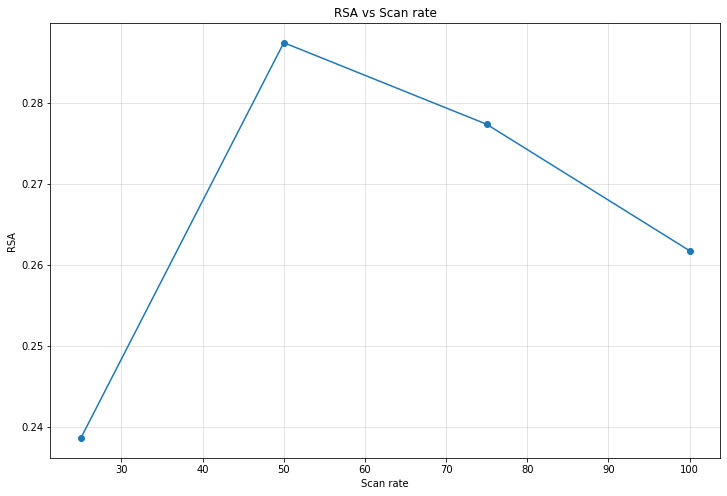

In [202]:
plt.figure(figsize=(12, 8))
plt.plot(charges['scan_rate'], charges['RSA'], '-o')
plt.grid('-', alpha = .4)
plt.title(r'RSA vs Scan rate')
plt.xlabel('Scan rate')
plt.ylabel(r'RSA')

# 3.5. Are the charges for hydrogen desorption and hydrogen adsorption equal? Comment on your observations.

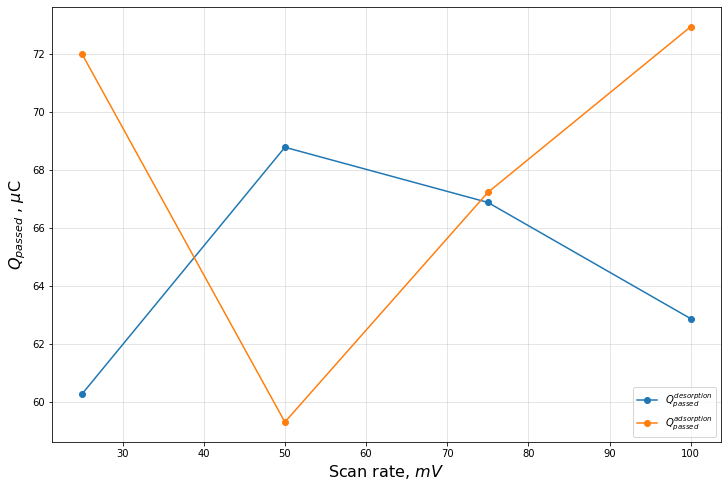

In [154]:
plt.figure(figsize=(12,8))
plt.grid('-', alpha = .4)
plt.plot(charges['scan_rate'], charges['Q_hydrogen_desorption'], '-o', label='$Q_{passed}^{desorption}$')
plt.plot(charges['scan_rate'], abs(charges['Q_hydrogen_adsorption']), '-o', label='$Q_{passed}^{adsorption}$')
plt.xlabel('Scan rate, $mV$', fontsize=16)
plt.ylabel('$Q_{passed}$ , $\mu$C', fontsize=16)
plt.legend()

# 3.6. Plot the CVs registered in 0.5 M H2SO4 with and without the addition of 0.005 M CuSO4

In [156]:
copper_dataset = {r'0.5M $H_{2}SO_{4}$' : acid_25_2nd_scan,
            r'0.5M $H_{2}SO_{4}$ + 0.005M $CuSO_{4}$': copper_25_2nd_scan}

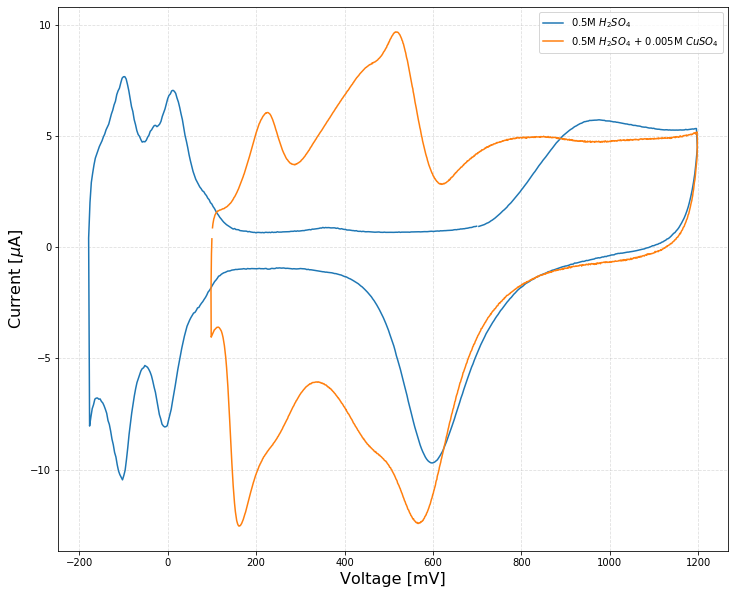

In [157]:
plot_many_voltammograms(copper_dataset)

# 3.7. Determine the charge for Cu monolayer desorption. For that, subtract the anodic part of the CV in 0.5 M H2SO4 from the anodic part of the CV in 0.5 M H2SO4 + 0.005 M CuSO4 solution. Integrate the resulting curve in the 0.1 – 0.62 V (vs AgCl/Cl-) range. Calculate the RSA value.

In [159]:
mask = ((acid_25_2nd_scan['Current'] >= 0) & (100 <=acid_25_2nd_scan['Voltage']) & (acid_25_2nd_scan['Voltage'] <= 620))

acid_dl_region = acid_25_2nd_scan[mask]

In [165]:
mask = ((copper_25_2nd_scan['Current'] >= 0) & (100 <=copper_25_2nd_scan['Voltage']) & (copper_25_2nd_scan['Voltage'] <= 620))

copper_dl_region = copper_25_2nd_scan[mask]

In [166]:
acid_dl_region.head()

,Scan,Index,Time_s,WE_1_Potential_V,WE_1_Current_A,Voltage,Current
1637,2,1638,202.411129,0.102631,0.000002,102.630615,1.829224
1638,2,1639,202.531129,0.105682,0.000002,105.682373,1.743469
1639,2,1640,202.651129,0.108704,0.000002,108.703613,1.626892
1640,2,1641,202.771129,0.111725,0.000002,111.724854,1.524963
1641,2,1642,202.891129,0.114777,0.000001,114.776611,1.441650


In [177]:
copper_dl_region.head()

,Scan,Index,Time_s,WE_1_Potential_V,WE_1_Current_A,Voltage,Current
2199,2,2200,119.052594,0.101166,8.789062e-07,101.165771,0.878906
2200,2,2201,119.092594,0.102173,1.056824e-06,102.172852,1.056824
2201,2,2202,119.132594,0.103210,1.187134e-06,103.210449,1.187134
2202,2,2203,119.172594,0.104218,1.285706e-06,104.217529,1.285706
2203,2,2204,119.212594,0.105225,1.333008e-06,105.224609,1.333008


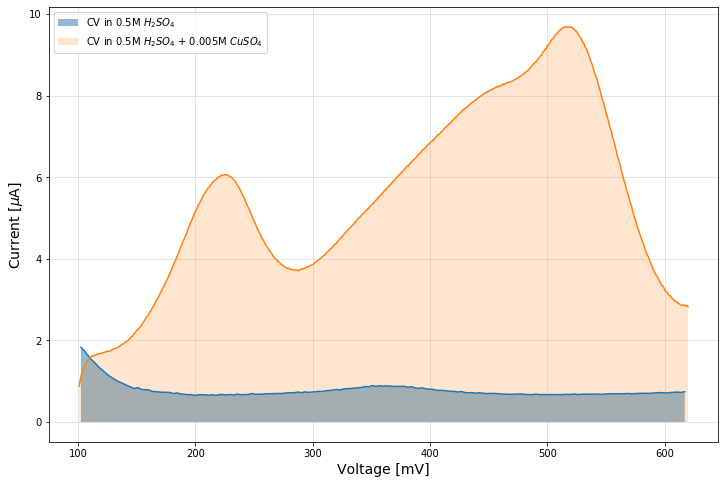

In [189]:
plt.figure(figsize=(12,8))
plt.plot(acid_dl_region['Voltage'], acid_dl_region['Current'])
plt.plot(copper_dl_region['Voltage'], copper_dl_region['Current'])
plt.xlabel('Voltage [mV]', fontsize=14)
plt.ylabel(r'Current $[\mu$A]', fontsize=14)
plt.fill_between(acid_dl_region['Voltage'], acid_dl_region['Current'], 0, alpha=.5, label=r'CV in 0.5M $H_{2}SO_{4}$')
plt.fill_between(copper_dl_region['Voltage'], copper_dl_region['Current'], 0, alpha=.2, label=r'CV in 0.5M $H_{2}SO_{4}$ + 0.005M $CuSO_{4}$')
plt.grid('-', alpha = .4)
plt.legend()

# 3.8. Compare the RSA values calculated based on H UPD and Cu UPD data. Comment on the differences and suggest explanation.

In [190]:
copper_area = auc(copper_dl_region['Voltage'],copper_dl_region['Current'])
hydrogen_area = auc(acid_dl_region['Voltage'],acid_dl_region['Current'])

In [195]:
Q_orange = copper_area/25

Q_blue = hydrogen_area/25

Q_cu = Q_orange - Q_blue

rsa = Q_cu/ 420

In [200]:
rsa

0.23386462236798944